# Big Data (UBA) -  2024

## Trabajo Práctico 3 

### Grupo 2
- Jimena Teran 
- Juan Lynch
- Renzo Falciglia

### Parte I: Analizando la base

#### Ejercicio 2
En este ejercicio se hace una limpieza de la base de datos y un primer análisis exploratorio.

In [109]:
#INCISO A

#Importamos los paquetes necesarios y cargamos el archivo del 1T de 2004

import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import numpy as np

#Cargamos archivo .sav
ruta_sav = "EPH_1T2004/Individual_t104.sav"
df_2004, meta_2004 = pyreadstat.read_sav(ruta_sav)

#Vemos el data frame
print(df_2004.head())


   CODUSU  nro_hogar  componente  h15    ano4  trimestre  region mas_500  \
0  125098        1.0         1.0  1.0  2004.0        1.0     1.0       S   
1  125397        1.0         1.0  1.0  2004.0        1.0     1.0       S   
2  125515        1.0         1.0  1.0  2004.0        1.0     1.0       S   
3  125558        1.0         1.0  1.0  2004.0        1.0     1.0       S   
4  125558        1.0         2.0  1.0  2004.0        1.0     1.0       S   

   aglomerado  pondera  ...  deccfr  ideccfr  rdeccfr  gdeccfr  pdeccfr  \
0        32.0   1299.0  ...      07                06       06            
1        32.0   2018.0  ...      00                00       00            
2        32.0   1486.0  ...      07                07       07            
3        32.0   1674.0  ...      08                08       08            
4        32.0   1674.0  ...      08                08       08            

   adeccfr  pj1_1  pj2_1  pj3_1  idimpp  
0       04    0.0    0.0    0.0   00000  
1       

In [110]:
#Cargamos el archivo del 1T 2024

#Cargamos el archivo archivo .txt
ruta_txt = "EPH_1T2024/usu_individual_T124.txt"
df_2024 = pd.read_csv(ruta_txt, delimiter=";")  

# Mostrar las primeras filas
print(df_2024.head())

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           3    1   
1  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           4    1   
2  TQRMNOPUTHLMKQCDEGGFB00852588  2024          1          1           5    0   
3  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           1    1   
4  TQRMNOPPWHLLKRCDEGGFB00852574  2024          1          1           2    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR    IPCF  DECCFR  \
0      42       S          10      439  ...      NaN       12       0      12   
1      42       S          10      439  ...      NaN       12       0      12   
2      42       S          10      439  ...      NaN       12       0      12   
3      42       S          10      675  ...      NaN        8  212500       6   
4      42       S          10      675  ...      NaN        8  212500       6   

   IDECCFR  RDECCFR  GDECC

/var/folders/yq/hslcp2kx13xch3kwq7cvmrf00000gn/T/ipykernel_19278/3068888573.py:5: DtypeWarning: Columns (102,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv(ruta_txt, delimiter=";")


In [111]:
#Analizamos las columnas de cada data frame para hacer la unión

#Listas de columnas
variables_2004 = df_2004.columns.tolist()
variables_2024 = df_2024.columns.tolist()

print("Variables 2004:")
print(variables_2004)
print("\nVariables 2024:")
print(variables_2024)

Variables 2004:
['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08

In [112]:
#Primero convierto los nombres del df de 2004 a mayúscula así están igual en ambas bases

#Cambio los nombres
df_2004.columns = df_2004.columns.str.upper()

print(df_2004.columns)

Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR',
       'PJ1_1', 'PJ2_1', 'PJ3_1', 'IDIMPP'],
      dtype='object', length=176)


In [113]:
#Definimos las variables que necesitaremos de ambas bases para poder hacer la unión

variables_filtrar = ["AGLOMERADO", "CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF", "P21"]

#Filtramos en la base de 2004
df_2004_filtrado = df_2004[variables_filtrar]

#Filtramos en la base de 2024
df_2024_filtrado = df_2024[variables_filtrar]

In [114]:
#Unión de los df

#Ordenamos las columnas por si están en diferente orden
df_2024_filtrado = df_2024_filtrado[df_2004_filtrado.columns]

#Agregamos una columna de origen a cada df
df_2004_filtrado["ORIGEN"] = "T1_2004"
df_2024_filtrado["ORIGEN"] = "T1_2024"

#Unimos verticalmente y verificamos los resultados
df_union = pd.concat([df_2004_filtrado, df_2024_filtrado], ignore_index=True)

print(df_union.head())

   AGLOMERADO  CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  CAT_INAC   IPCF  \
0        32.0   1.0  79.0   4.0   1.0       3.0     3.0       1.0  368.0   
1        32.0   2.0  67.0   3.0   4.0       2.0     1.0       0.0    0.0   
2        32.0   2.0  74.0   4.0   1.0       2.0     3.0       1.0  440.0   
3        32.0   1.0  54.0   2.0   2.0       2.0     1.0       0.0  532.5   
4        32.0   2.0  51.0   2.0   2.0       6.0     3.0       4.0  532.5   

      P21   ORIGEN  
0     0.0  T1_2004  
1     0.0  T1_2004  
2     0.0  T1_2004  
3  2000.0  T1_2004  
4     0.0  T1_2004  


/var/folders/yq/hslcp2kx13xch3kwq7cvmrf00000gn/T/ipykernel_19278/87511415.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004_filtrado["ORIGEN"] = "T1_2004"


In [115]:
#Filtro los aglomerados que no corresponden a CABA o a partidos del Gran Buenos Aires

df_union_filtrado = df_union[df_union["AGLOMERADO"].isin([32, 33])]

print(df_union_filtrado.head())

   AGLOMERADO  CH04  CH06  CH07  CH08  NIVEL_ED  ESTADO  CAT_INAC   IPCF  \
0        32.0   1.0  79.0   4.0   1.0       3.0     3.0       1.0  368.0   
1        32.0   2.0  67.0   3.0   4.0       2.0     1.0       0.0    0.0   
2        32.0   2.0  74.0   4.0   1.0       2.0     3.0       1.0  440.0   
3        32.0   1.0  54.0   2.0   2.0       2.0     1.0       0.0  532.5   
4        32.0   2.0  51.0   2.0   2.0       6.0     3.0       4.0  532.5   

      P21   ORIGEN  
0     0.0  T1_2004  
1     0.0  T1_2004  
2     0.0  T1_2004  
3  2000.0  T1_2004  
4     0.0  T1_2004  


In [116]:
#INCISO B

#Elimino las observaciones que tienen negativo en ingresos y en edad

df_union_filtrado = df_union_filtrado[(df_union_filtrado['CH06'] >= 0) & (df_union_filtrado['P21'] >= 0)]


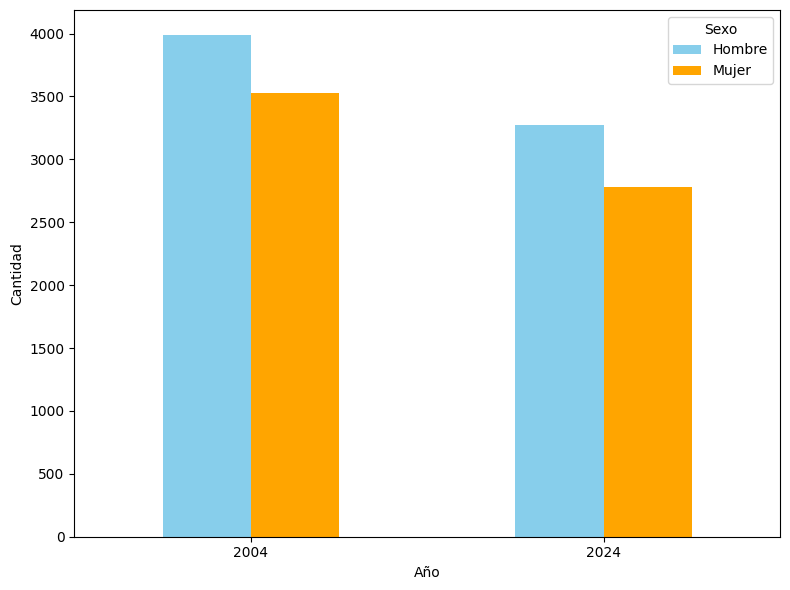

In [117]:
#INCISO C
#Preparamos los datos y creamos un gráfico de barras por sexo en cada año

#Filtramos los datos por año
df_2024 = df_union_filtrado[(df_union_filtrado['ORIGEN'] == "T1_2024") & (df_union_filtrado['CH04'].notna())]
df_2004 = df_union_filtrado[(df_union_filtrado['ORIGEN'] == "T1_2004") & (df_union_filtrado['CH04'].notna())]

#Contamos la cantidad por año
conteo_2024 = df_2024['CH04'].value_counts()
conteo_2004 = df_2004['CH04'].value_counts()

#Creamos el df necesario para el gráfico
df_composicion = pd.DataFrame({
    '2004': conteo_2004,
    '2024': conteo_2024
}).fillna(0)

#Mapeamos las etiquetas 
etiquetas = {1: "Hombre", 2: "Mujer"}
df_composicion.index = df_composicion.index.map(etiquetas)

# Creamos el gráfico de barras
df_composicion.T.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange'])
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(['Hombre', 'Mujer'], title='Sexo', loc='upper right')  # Leyenda en la esquina superior derecha
plt.tight_layout()
plt.show()


In [118]:
#INCISO D

In [119]:
#INCISO E

#### Ejercicio 3
En este ejercicio se divide la base entre aquellas personas que hayan respondido y las que no

In [120]:
#Analizamos que cantidad de personas no respondió la encuesta tanto en 2024 como en 2004

conteo_1T2024 = ((df_union_filtrado['ESTADO'] == 0) & (df_union_filtrado['ORIGEN'] == 'T1_2024')).sum()
conteo_1T2004 = ((df_union_filtrado['ESTADO'] == 0) & (df_union_filtrado['ORIGEN'] == 'T1_2004')).sum()

print(f"Cantidad de personas que no respondieron su condición de actividad en 2024: {conteo_1T2024}")
print(f"Cantidad de personas que no respondieron su condición de actividad en 2004: {conteo_1T2004}")

Cantidad de personas que no respondieron su condición de actividad en 2024: 41
Cantidad de personas que no respondieron su condición de actividad en 2004: 10


In [121]:
#Creamos un df con las personas que respondieron (ESTADO <> 0)
respondieron = df_union_filtrado[df_union_filtrado['ESTADO'] != 0]

#Y creamos otro df con las personas que no respondieron (ESTADO = 0)
no_respondieron = df_union_filtrado[df_union_filtrado['ESTADO'] == 0]

#Calculamos el tamaño de cada uno en filas

cantidad_respondieron = len(respondieron)
cantidad_no_respondieron = len(no_respondieron)

print(f"Cantidad de personas que respondieron: {cantidad_respondieron}")
print(f"Cantidad de personas que no respondieron: {cantidad_no_respondieron}")

Cantidad de personas que respondieron: 13519
Cantidad de personas que no respondieron: 51


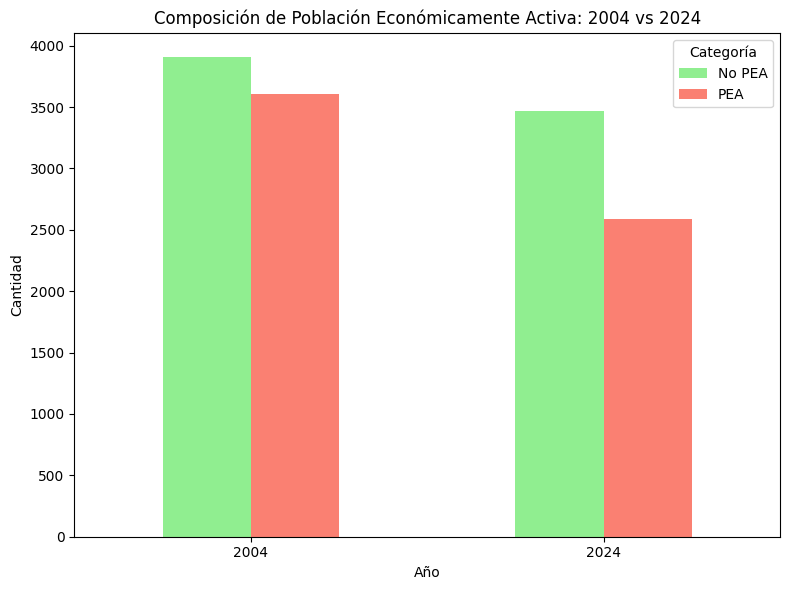


Comentarios:
1. En 2004, la PEA era mayor y más equilibrada con la población no activa.
2. En 2024, se observa una reducción de la PEA y un aumento en la población fuera de ella.
3. Los cambios podrían explicarse por factores demográficos (envejecimiento poblacional) o socioeconómicos (falta de empleo).


In [122]:
#Ejercicio 4

# Agregamos columna PEA: 1 si ESTADO indica ocupado o desocupado (valores 1 o 2)
df_union_filtrado["PEA"] = df_union_filtrado["ESTADO"].apply(lambda x: 1 if x in [1, 2] else 0)

#####Gráfico

## Filtramos datos por año
df_2004_pea = df_union_filtrado[df_union_filtrado["ORIGEN"] == "T1_2004"]
df_2024_pea = df_union_filtrado[df_union_filtrado["ORIGEN"] == "T1_2024"]

# Conteo de PEA y no PEA para 2004
conteo_pea_2004 = df_2004_pea["PEA"].value_counts()

# Conteo de PEA y no PEA para 2024
conteo_pea_2024 = df_2024_pea["PEA"].value_counts()

# Creamos DataFrame para gráfico
df_pea_composicion = pd.DataFrame({
    '2004': conteo_pea_2004,
    '2024': conteo_pea_2024
}).fillna(0)

#$etiquetas (1: PEA, 0: No PEA)
etiquetas_pea = {1: "PEA", 0: "No PEA"}
df_pea_composicion.index = df_pea_composicion.index.map(etiquetas_pea)

# Creamos gráfico de barras
df_pea_composicion.T.plot(kind='bar', figsize=(8, 6), color=['lightgreen', 'salmon'])
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.legend(['No PEA', 'PEA'], title='Categoría', loc='upper right')  # Leyenda
plt.title('Composición de Población Económicamente Activa: 2004 vs 2024')
plt.tight_layout()
plt.show()

# Observaciones generales

#En 2004, la PEA (Población Económicamente Activa) era mayor y estaba más equilibrada con la población fuera de la PEA, 
#mientras que en 2024 se observa una reducción notable en la PEA y un aumento de la población inactiva. Este cambio podría 
# deberse a factores demográficos, como el envejecimiento poblacional, o socioeconómicos, como la falta de oportunidades laborales. 
# El aumento en la población no activa podría reflejar barreras para ingresar al mercado laboral o un mayor número de estudiantes y jubilados. 
# Este análisis sugiere la necesidad de investigar cómo nivel educativo, género y políticas económicas han influido en estas tendencias.

print("\nComentarios:")
print("1. En 2004, la PEA era mayor y más equilibrada con la población no activa.")
print("2. En 2024, se observa una reducción de la PEA y un aumento en la población fuera de ella.")
print("3. Los cambios podrían explicarse por factores demográficos (envejecimiento poblacional) o socioeconómicos (falta de empleo).")

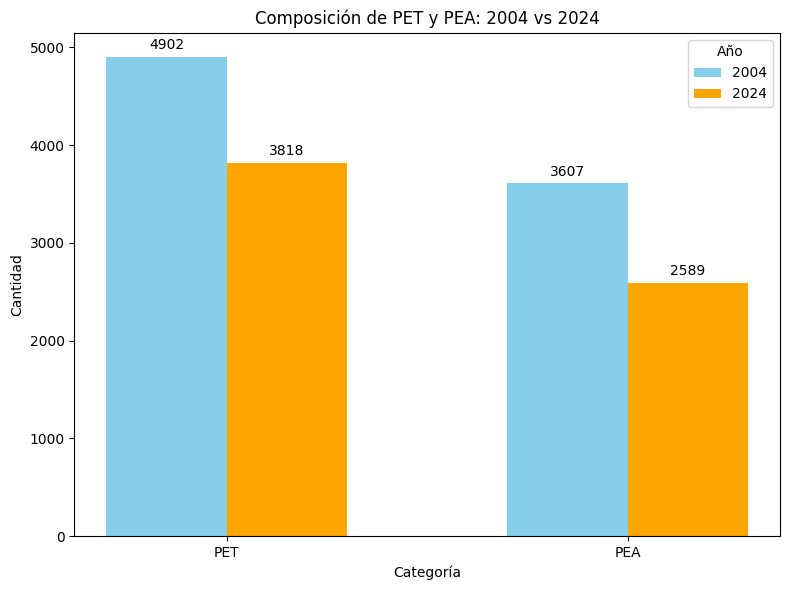

Resultados del análisis de PET y PEA:

Año 2004:
  - Personas en PET: 4902
  - Personas fuera de PET: 2614
  - Personas en PEA: 3607
  - Personas fuera de PEA: 3909

Año 2024:
  - Personas en PET: 3818
  - Personas fuera de PET: 2236
  - Personas en PEA: 2589
  - Personas fuera de PEA: 3465


In [123]:
#Punto 5

# Agregamos la columna PET (Población en Edad para Trabajar): 1 si la persona tiene entre 15 y 65 años cumplidos
df_union_filtrado["PET"] = df_union_filtrado["CH06"].apply(lambda x: 1 if 15 <= x <= 65 else 0)

import matplotlib.pyplot as plt
import numpy as np

# Crear un DataFrame con solo los valores "en categoría" (dentro de PET y PEA)
df_comparacion_simplificada = pd.DataFrame({
    "2004": [conteo_pet_2004.get(1, 0), conteo_pea_2004.get(1, 0)],
    "2024": [conteo_pet_2024.get(1, 0), conteo_pea_2024.get(1, 0)]
}, index=["PET", "PEA"])

# Configurar posiciones para las barras
x = np.arange(len(df_comparacion_simplificada.index))  # Índices de PET y PEA
width = 0.3  # Ancho de las barras

# Crear gráfico de barras agrupado
fig, ax = plt.subplots(figsize=(8, 6))

bars_2004 = ax.bar(x - width / 2, df_comparacion_simplificada["2004"], width, label="2004", color="skyblue")
bars_2024 = ax.bar(x + width / 2, df_comparacion_simplificada["2024"], width, label="2024", color="orange")

# Agregar etiquetas encima de las barras
for bars in [bars_2004, bars_2024]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{int(height)}', ha='center', va='bottom')

# Configurar etiquetas y leyenda
ax.set_xlabel("Categoría")
ax.set_ylabel("Cantidad")
ax.set_title("Composición de PET y PEA: 2004 vs 2024")
ax.set_xticks(x)
ax.set_xticklabels(df_comparacion_simplificada.index)
ax.legend(title="Año", loc="upper right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimimos los resultados
print("Resultados del análisis de PET y PEA:")
print("\nAño 2004:")
print(f"  - Personas en PET: {conteo_pet_2004.get(1, 0)}")
print(f"  - Personas fuera de PET: {conteo_pet_2004.get(0, 0)}")
print(f"  - Personas en PEA: {conteo_pea_2004.get(1, 0)}")
print(f"  - Personas fuera de PEA: {conteo_pea_2004.get(0, 0)}")

print("\nAño 2024:")
print(f"  - Personas en PET: {conteo_pet_2024.get(1, 0)}")
print(f"  - Personas fuera de PET: {conteo_pet_2024.get(0, 0)}")
print(f"  - Personas en PEA: {conteo_pea_2024.get(1, 0)}")
print(f"  - Personas fuera de PEA: {conteo_pea_2024.get(0, 0)}")


#En 2004, la PET (Población en Edad para Trabajar) era de 4902 personas, mientras que en 2024 disminuyó a 3818, reflejando un cambio demográfico significativo.
#La PEA (Población Económicamente Activa) también muestra una reducción, pasando de 3607 personas en 2004 a 2589 en 2024.
#Esta caída más pronunciada en la PEA respecto a la PET indica una menor participación laboral dentro de la población en edad de trabajar.
#En 2004, el 73.6% de la PET participaba en la PEA, mientras que en 2024 esta proporción cayó al 67.8%.
#Estos resultados sugieren un aumento de la inactividad laboral entre las personas en edad de trabajar, posiblemente debido a jubilaciones, estudios o desincentivos laborales.
#El descenso en la PEA podría estar vinculado a dinámicas económicas y sociales, como la falta de empleo o condiciones laborales desfavorables.
#La reducción de la PET puede deberse al envejecimiento poblacional, que disminuye la cantidad de personas en edad de trabajar.
#La relación entre PET y PEA refleja un cambio estructural en la composición de la fuerza laboral entre 2004 y 2024.

Cantidad de desocupados en 2004: 528
Cantidad de desocupados en 2024: 311


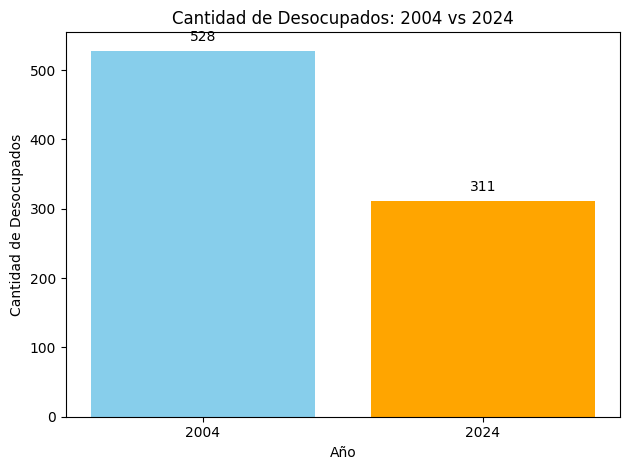

In [124]:
#Punto 6

# Crear la columna 'desocupado'
df_union_filtrado["desocupado"] = df_union_filtrado["ESTADO"].apply(lambda x: 1 if x == 2 else 0)


# Contar desocupados para 2004
desocupados_2004 = df_union_filtrado[(df_union_filtrado["ORIGEN"] == "T1_2004") & (df_union_filtrado["desocupado"] == 1)].shape[0]

# Contar desocupados para 2024
desocupados_2024 = df_union_filtrado[(df_union_filtrado["ORIGEN"] == "T1_2024") & (df_union_filtrado["desocupado"] == 1)].shape[0]

# Imprimir resultados
print(f"Cantidad de desocupados en 2004: {desocupados_2004}")
print(f"Cantidad de desocupados en 2024: {desocupados_2024}")

import matplotlib.pyplot as plt

# Datos para el gráfico
desocupados = [desocupados_2004, desocupados_2024]
años = ["2004", "2024"]

# Crear gráfico de barras
plt.bar(años, desocupados, color=["skyblue", "orange"])
plt.xlabel("Año")
plt.ylabel("Cantidad de Desocupados")
plt.title("Cantidad de Desocupados: 2004 vs 2024")

# Mostrar valores sobre las barras
for i, valor in enumerate(desocupados):
    plt.text(i, valor + 10, str(valor), ha="center", va="bottom")

plt.tight_layout()
plt.show()



                                2004      2024
NIVEL_ED                                      
Primario completo           0.077875  0.042735
Primario incompleto         0.065725  0.053272
Secundario completo         0.135521  0.080369
Secundario incompleto       0.126151  0.101325
Sin instrucción             0.030583  0.002358
Terciario/Univ. completo    0.004451  0.000000
Terciario/Univ. incompleto  0.055641  0.032825


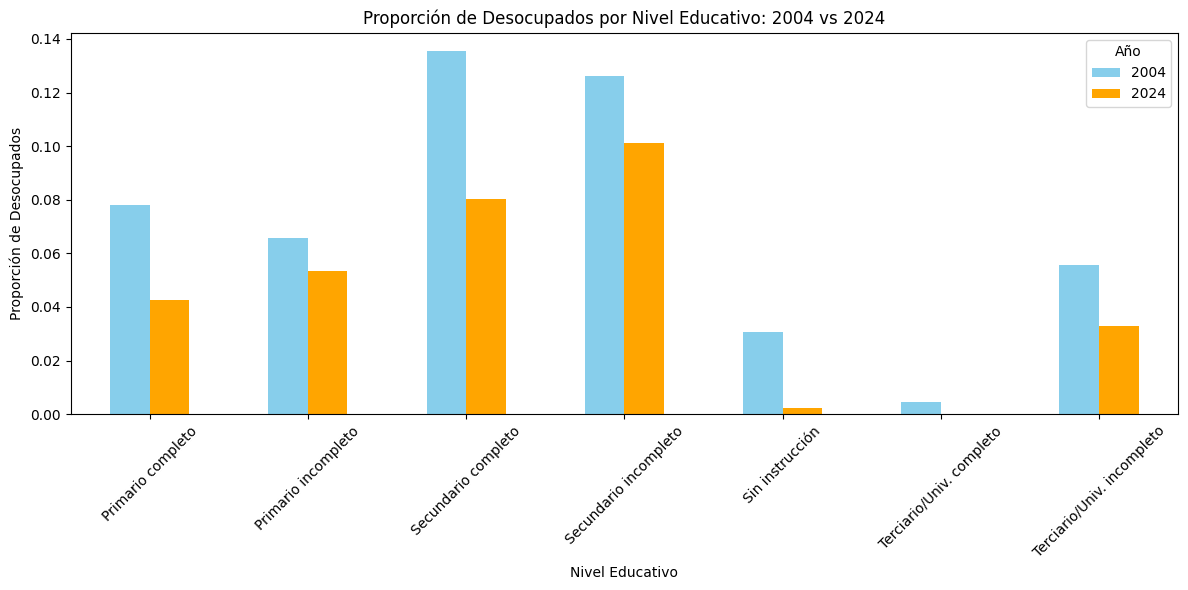

In [125]:
#Punto 6 - a

# Mapear los niveles educativos ANTES de calcular proporciones
niveles_educativos = {
    1: "Sin instrucción",
    2: "Primario incompleto",
    3: "Primario completo",
    4: "Secundario incompleto",
    5: "Secundario completo",
    6: "Terciario/Univ. incompleto",
    7: "Terciario/Univ. completo"
}
df_union_filtrado["NIVEL_ED"] = df_union_filtrado["NIVEL_ED"].map(niveles_educativos)

# Calcular proporción de desocupados por nivel educativo en 2004
proporcion_educ_2004 = df_union_filtrado[df_union_filtrado["ORIGEN"] == "T1_2004"].groupby("NIVEL_ED")["desocupado"].mean()

# Calcular proporción de desocupados por nivel educativo en 2024
proporcion_educ_2024 = df_union_filtrado[df_union_filtrado["ORIGEN"] == "T1_2024"].groupby("NIVEL_ED")["desocupado"].mean()

# Crear DataFrame para comparar
df_proporcion_educ = pd.DataFrame({
    "2004": proporcion_educ_2004,
    "2024": proporcion_educ_2024
}).fillna(0)

# Imprimir resultados
print(df_proporcion_educ)

# Crear gráfico comparativo con ajustes para etiquetas superpuestas
df_proporcion_educ.plot(kind="bar", figsize=(12, 6), color=["skyblue", "orange"])
plt.xlabel("Nivel Educativo")
plt.ylabel("Proporción de Desocupados")
plt.title("Proporción de Desocupados por Nivel Educativo: 2004 vs 2024")
plt.legend(title="Año")

# Rotar las etiquetas del eje X a 45 grados y reducir el tamaño de fuente
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

#En casi todos los niveles educativos, la proporción de desocupados es menor en 2024 en comparación con 2004.

                2004      2024
edad_grupo                    
0-9         0.000000  0.000000
10-19       0.069678  0.034123
20-29       0.152366  0.133178
30-39       0.086957  0.060309
40-49       0.058889  0.083449
50-59       0.088235  0.051562
60-69       0.057692  0.036207
70-79       0.017937  0.008264
80-89       0.005291  0.000000
90-99       0.000000  0.000000


/var/folders/yq/hslcp2kx13xch3kwq7cvmrf00000gn/T/ipykernel_19278/3356925912.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion_edad_2004 = df_union_filtrado[df_union_filtrado["ORIGEN"] == "T1_2004"].groupby("edad_grupo")["desocupado"].mean()
/var/folders/yq/hslcp2kx13xch3kwq7cvmrf00000gn/T/ipykernel_19278/3356925912.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion_edad_2024 = df_union_filtrado[df_union_filtrado["ORIGEN"] == "T1_2024"].groupby("edad_grupo")["desocupado"].mean()


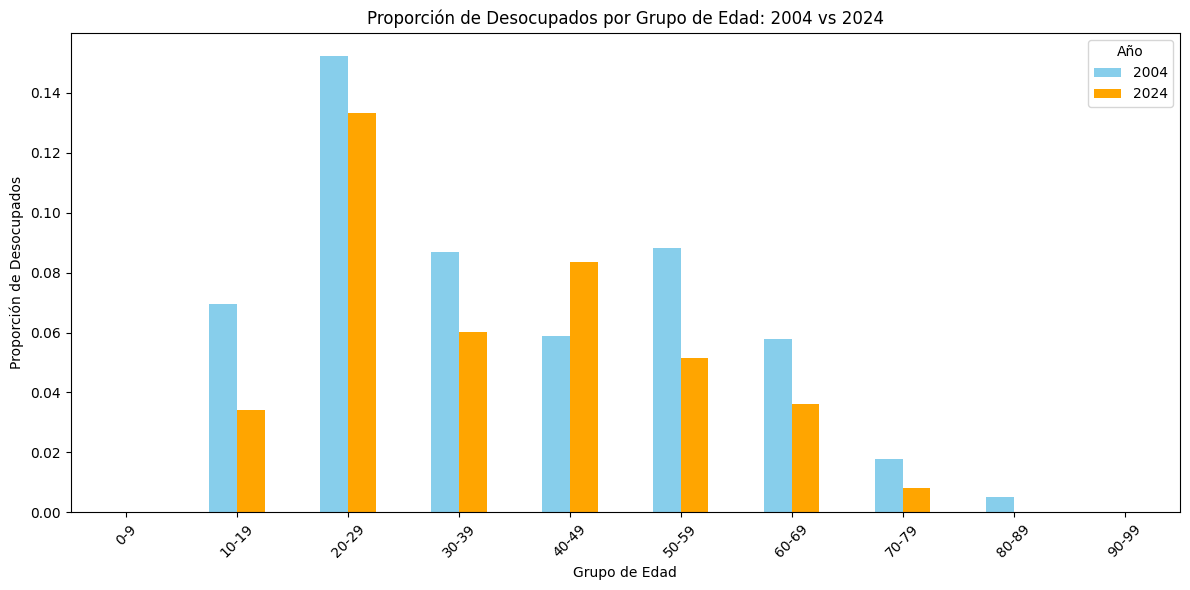

In [126]:
#Punto 6 - b

# Crear la variable categórica de edad agrupada (de a 10 años)
df_union_filtrado["edad_grupo"] = pd.cut(
    df_union_filtrado["CH06"],                   # Columna de edades
    bins=range(0, 101, 10),                      # Intervalos de 10 años: 0-9, 10-19, ..., 90-99
    right=False,                                 # Intervalos cerrados a la izquierda
    labels=[f"{i}-{i+9}" for i in range(0, 100, 10)]  # Etiquetas: "0-9", "10-19", ...
)

# Proporción de desocupados por grupo de edad en 2004
proporcion_edad_2004 = df_union_filtrado[df_union_filtrado["ORIGEN"] == "T1_2004"].groupby("edad_grupo")["desocupado"].mean()

# Proporción de desocupados por grupo de edad en 2024
proporcion_edad_2024 = df_union_filtrado[df_union_filtrado["ORIGEN"] == "T1_2024"].groupby("edad_grupo")["desocupado"].mean()

# Crear DataFrame para comparar
df_proporcion_edad = pd.DataFrame({
    "2004": proporcion_edad_2004,
    "2024": proporcion_edad_2024
}).fillna(0)

# Imprimir los resultados
print(df_proporcion_edad)

# Crear gráfico comparativo
df_proporcion_edad.plot(kind="bar", figsize=(12, 6), color=["skyblue", "orange"])
plt.xlabel("Grupo de Edad")
plt.ylabel("Proporción de Desocupados")
plt.title("Proporción de Desocupados por Grupo de Edad: 2004 vs 2024")
plt.legend(title="Año")
plt.xticks(rotation=45)  # Rotar etiquetas para mayor claridad
plt.tight_layout()
plt.show()

#El gráfico confirma una disminución general en la proporción de desocupados en casi todos los grupos de edad entre 2004 y 2024, 
#destacando el aumento específico en el grupo de 40 a 49 años, que podría necesitar mayor atención en términos de políticas laborales.

    Año  Tasa INDEC (%)  Tasa PET (%)
0  2004       12.434692      9.730172
1  2024        8.346972      6.398996


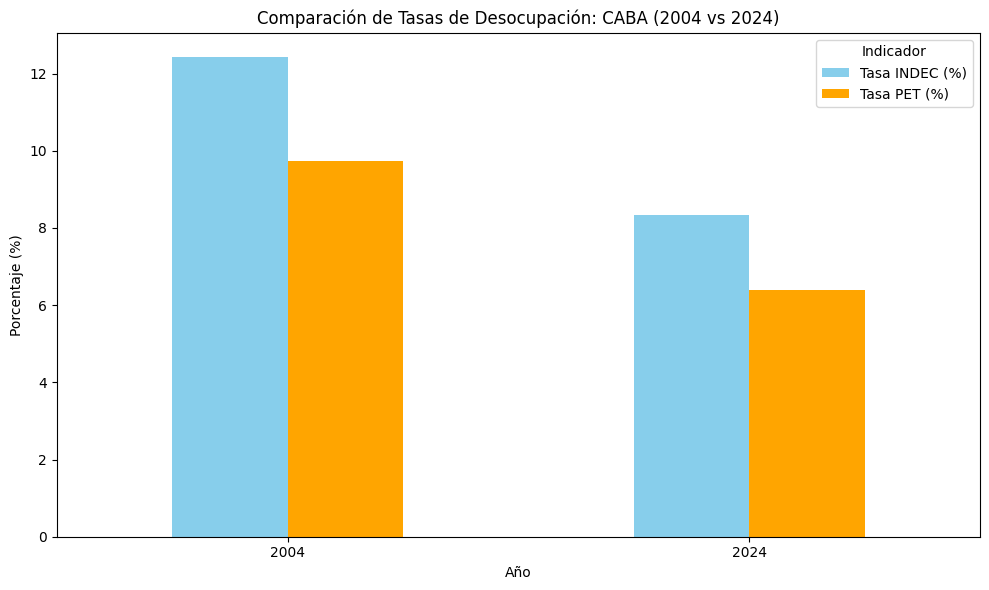

In [127]:
#Punto 7 

# Filtrar datos de CABA
caba_2004 = df_union_filtrado[(df_union_filtrado["ORIGEN"] == "T1_2004") & (df_union_filtrado["AGLOMERADO"] == 32)]
caba_2024 = df_union_filtrado[(df_union_filtrado["ORIGEN"] == "T1_2024") & (df_union_filtrado["AGLOMERADO"] == 32)]

# Calcular desocupados y PEA para 2004 y 2024
desocupados_2004 = caba_2004["desocupado"].sum()
pea_2004 = caba_2004["PEA"].sum()
pet_2004 = caba_2004["PET"].sum()

desocupados_2024 = caba_2024["desocupado"].sum()
pea_2024 = caba_2024["PEA"].sum()
pet_2024 = caba_2024["PET"].sum()

# Calcular tasas
tasa_indec_2004 = (desocupados_2004 / pea_2004) * 100
tasa_indec_2024 = (desocupados_2024 / pea_2024) * 100

tasa_pet_2004 = (desocupados_2004 / pet_2004) * 100
tasa_pet_2024 = (desocupados_2024 / pet_2024) * 100

# Crear DataFrame para comparar tasas
df_tasas = pd.DataFrame({
    "Año": ["2004", "2024"],
    "Tasa INDEC (%)": [tasa_indec_2004, tasa_indec_2024],
    "Tasa PET (%)": [tasa_pet_2004, tasa_pet_2024]
})

# Imprimir resultados
print(df_tasas)

# Crear gráfico comparativo
df_tasas.set_index("Año").plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange"])
plt.title("Comparación de Tasas de Desocupación: CABA (2004 vs 2024)")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.legend(title="Indicador")
plt.tight_layout()
plt.show()

#Las tasas de desocupación, tanto según INDEC como respecto a la PET, disminuyen significativamente entre 2004 y 2024.
#La tasa INDEC es mayor que la tasa PET en ambos años, ya que mide la desocupación solo sobre quienes participan activamente en el mercado laboral (PEA).
#La tasa PET, al considerar toda la población en edad de trabajar, muestra proporciones más bajas pero una reducción más pronunciada entre los años analizados.
#Este comportamiento sugiere que, además de una mejora en el empleo, podría haber un aumento en la inactividad laboral dentro de la población en edad de trabajar.
#La tasa INDEC es más adecuada para analizar dinámicas del mercado laboral, pero sufre de endogeneidad al depender de la decisión de participar o no en la PEA.
#La tasa PET, por otro lado, capta una perspectiva más amplia y estructural, incluyendo a quienes están fuera del mercado laboral.